IMPORTANDO BIBLIOTECAS

In [31]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt
from matplotlib.dates import YearLocator, MonthLocator, DateFormatter
import yfinance as yf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.stattools import adfuller
import seaborn as sns
import numpy as np


Sugestão de leitura:
https://mariofilho.com/guia-rapido-para-iniciantes-em-series-temporais-time-series/

REALIZANDO DOWNLOAD DO DATAFRAME COM OS DADOS NECESSÁRIOS

In [16]:
# Symbol da Ibovespa e o intervalo de tempo
symbol = '^BVSP'
start_date = '2017-01-01'
end_date = '2023-12-12'

# Download do yf
df = yf.download(symbol, start=start_date, end=end_date)
#df.to_csv("df.csv", index=True)
df.index = pd.to_datetime(df.index)  # Certifique-se de que o índice seja do tipo DatetimeIndex
#df = df.asfreq('D')  # Defina a frequência como diária (ou ajuste para a frequência apropriada)
df.to_csv("df1.csv", index=True)

df_original = yf.download(symbol, start=start_date, end=end_date)
df_original.index = pd.to_datetime(df_original.index)  # Certifique-se de que o índice seja do tipo DatetimeIndex
df_original = df_original.asfreq('D')  # Defina a frequência como diária (ou ajuste para a frequência apropriada)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


tendencia - direção

sazonalidade - recorrência das oscilações

resíduo -  o que sobra do sinal

In [3]:
df_original

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-01-02,60227.0,60227.0,59371.0,59589.0,59589.0,808700.0
2017-01-03,59631.0,61815.0,59631.0,61814.0,61814.0,3328300.0
2017-01-04,61811.0,61940.0,61302.0,61589.0,61589.0,2840800.0
2017-01-05,61594.0,62409.0,61594.0,62071.0,62071.0,3313000.0
2017-01-06,62072.0,62072.0,61396.0,61665.0,61665.0,2374800.0
...,...,...,...,...,...,...
2023-12-07,125623.0,126581.0,125566.0,126010.0,126010.0,10505300.0
2023-12-08,126010.0,127289.0,125562.0,127094.0,127094.0,10745300.0
2023-12-09,NaN,NaN,NaN,NaN,NaN,NaN


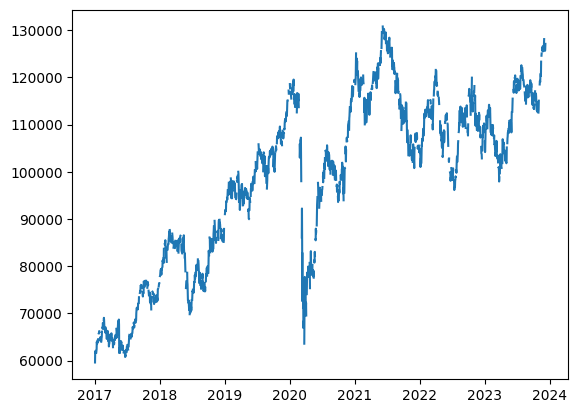

In [4]:
plt.plot(df_original.index,df_original.Close)

DECOMPONDO A SÉRIE TEMPORAL

utilizamos interpolação linear para preencher os dados ausentes no Dataframe

In [19]:
df = pd.DataFrame(df['Close'])
df = df.resample('D').interpolate()
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2535 entries, 2017-01-02 to 2023-12-11
Freq: D
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   2535 non-null   float64
dtypes: float64(1)
memory usage: 39.6 KB


In [20]:
resultados = seasonal_decompose(df)

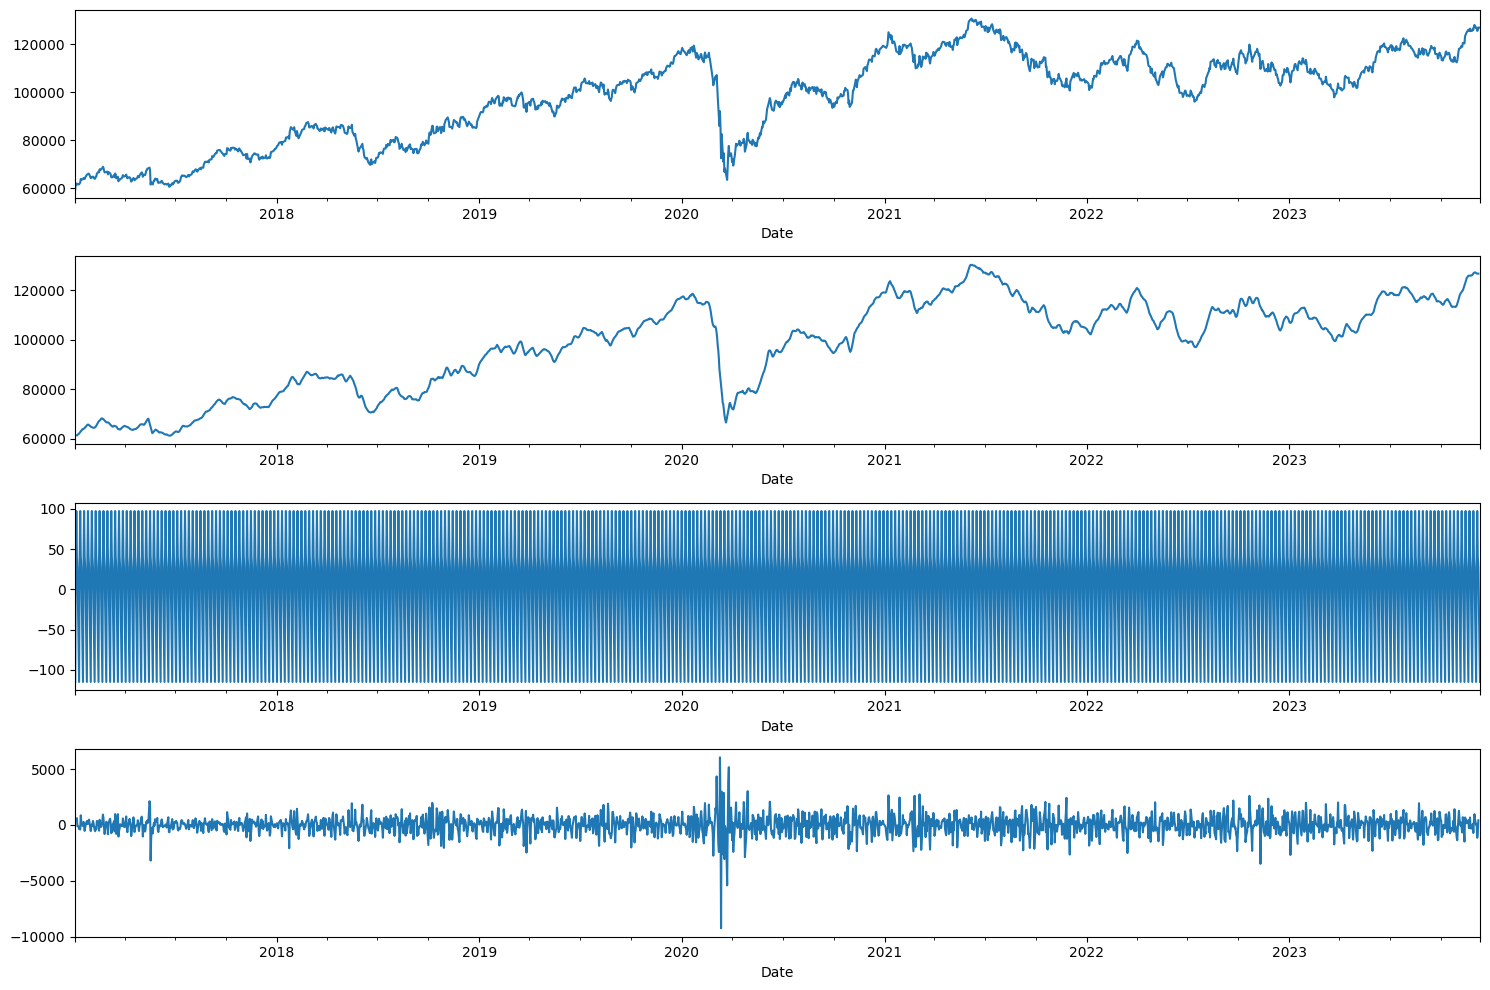

In [21]:
fig, (ax1,ax2,ax3,ax4) = plt.subplots(4,1, figsize = (15,10))

resultados.observed.plot(ax=ax1)
resultados.trend.plot(ax=ax2)
resultados.seasonal.plot(ax=ax3)
resultados.resid.plot(ax=ax4)

plt.tight_layout()

Em análise de séries temporais, a estacionariedade é uma propriedade importante. Uma série temporal é considerada estacionária quando suas propriedades estatísticas, como média e variância, permanecem constantes ao longo do tempo. Isso facilita a modelagem e previsão, pois muitos métodos estatísticos pressupõem estacionariedade.

**Série Temporal Estacionária:**

Uma série temporal é estacionária se ela atender a três critérios principais:

1. **Média Constante:** A média da série temporal permanece constante ao longo do tempo.

2. **Variância Constante:** A variância (dispersão) da série temporal também permanece constante.

3. **Autocorrelação Constante:** A autocorrelação (correlação da série com ela mesma em diferentes momentos no tempo) entre os valores da série temporal é constante.

Quando uma série temporal é estacionária, torna-se mais fácil aplicar métodos estatísticos e modelos de previsão, como modelos ARIMA (AutoRegressive Integrated Moving Average) e SARIMA (Seasonal ARIMA).

**Série Temporal Não Estacionária:**

Uma série temporal é considerada não estacionária se pelo menos uma das propriedades mencionadas acima não for atendida. Isso geralmente ocorre quando há tendências temporais, sazonalidade ou outros padrões que afetam a média, a variância ou a autocorrelação ao longo do tempo.

Para tornar uma série temporal não estacionária em estacionária, é possível aplicar técnicas como diferenciação (subtrair um valor do próximo) para remover tendências lineares ou sazonalidades.

É importante identificar se uma série temporal é estacionária ou não antes de aplicar modelos de previsão, pois isso impactará a escolha do modelo e a interpretação dos resultados. Existem testes estatísticos específicos, como o teste Augmented Dickey-Fuller (ADF), que podem ajudar a determinar a estacionariedade de uma série temporal.

Os dados utilizados são não estácionários, porém vamos utilizar de métodos matemáticos para "estacionalizar" o dataframe para simplificar a modelagem

Para isso vamos utilizar a análise ADF (Augmented Dickey Fuller)


#H0 - Hipótese Nula (não é estacionária)

#H1 - Hipótese Alternativa (rejeição da hipótese nula)

p -value = 0.05 (5%), então rejeitamos H0 com um nível de confiança de 95%

In [27]:
sns.set_style('darkgrid')
X = df.Close.values
result = adfuller(X)

print("Teste ADF")
print(f"Teste Estatístico: {result[0]}")
print(f"P-Value: {result[1]}")
print("Valores críticos:")

for key, value in result[4].items():
  print(f"\t{key}: {value}")

Teste ADF
Teste Estatístico: -2.054227203795703
P-Value: 0.2633136582379329
Valores críticos:
	1%: -3.4329507078222634
	5%: -2.8626889823128554
	10%: -2.567381647203466


Diagnosticada que a série não é estacionária (esperado), vamos tentar estacionar a série para trabalhar melhor com a modelagem

<Axes: xlabel='Date'>

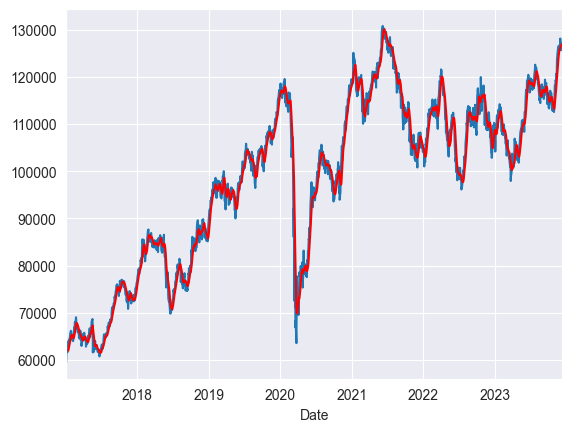

In [29]:
ma = df.rolling(12).mean()

f, ax = plt.subplots()
df.plot(ax=ax, legend=False)
ma.plot(ax=ax, legend=False, color='r')

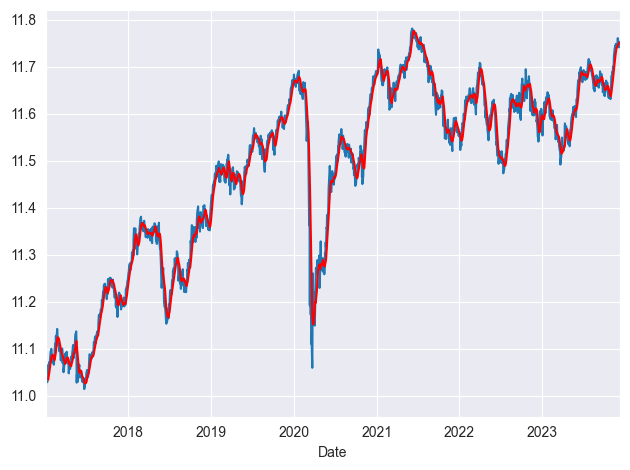

In [32]:
df_log = np.log(df)
ma_log = df_log.rolling(12).mean()

f, ax = plt.subplots()
df_log.plot(ax=ax, legend=False)
ma_log.plot(ax=ax, legend=False, color='r')
plt.tight_layout()

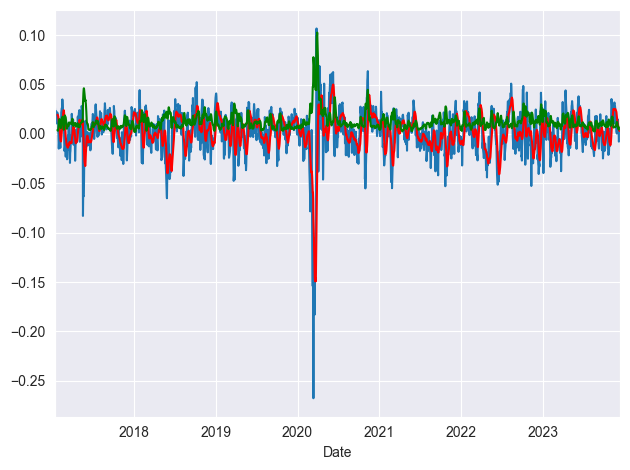

In [33]:
df_s = (df_log - ma_log).dropna()

ma_s = df_s.rolling(12).mean()

std = df_s.rolling(12).std()

f, ax = plt.subplots()
df_s.plot(ax=ax, legend=False)
ma_s.plot(ax=ax, legend=False, color='r')
std.plot(ax=ax, legend=False, color='g')
plt.tight_layout()

Após logaritmizar a série temporal,vams realzar novamente o teste adfuller para diagnosticar se a série estacionou ou não

In [35]:
X_s = df_s.Close.values
result_s = adfuller(X_s)

print("Teste ADF")
print(f"Teste Estatístico: {result_s[0]}")
print(f"P-Value: {result_s[1]}")
print("Valores críticos:")

for key, value in result_s[4].items():
  print(f"\t{key}: {value}")

Teste ADF
Teste Estatístico: -8.708570816673005
P-Value: 3.6432733280724486e-14
Valores críticos:
	1%: -3.4329642237790847
	5%: -2.862694950990622
	10%: -2.5673848250020415


Por meio de diferenciação vamos tentar deixar ela mais estacionária ainda

Teste ADF
Teste Estatístico: -16.955866383823974
P-Value: 9.386689351975095e-30
Valores críticos:
	1%: -3.4329642237790847
	5%: -2.862694950990622
	10%: -2.5673848250020415


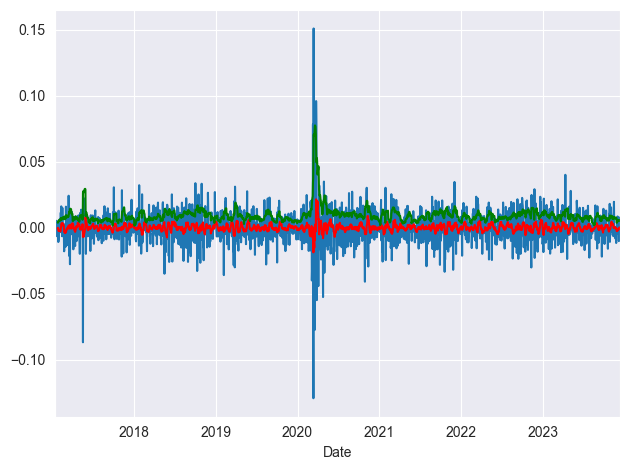

In [37]:
df_diff = df_s.diff(1)
ma_diff = df_diff.rolling(12).mean()

std_diff = df_diff.rolling(12).std()


f, ax = plt.subplots()
df_diff.plot(ax=ax, legend=False)
ma_diff.plot(ax=ax, legend=False, color='r')
std_diff.plot(ax=ax, legend=False, color='g')
plt.tight_layout()

X_diff = df_diff.Close.dropna().values
result_diff = adfuller(X_diff)

print("Teste ADF")
print(f"Teste Estatístico: {result_diff[0]}")
print(f"P-Value: {result_diff[1]}")
print("Valores críticos:")

for key, value in result_diff[4].items():
  print(f"\t{key}: {value}")

Forçar a estacionalização de uma série temporal pode afetar os resultados obtidos em previsões futuras. A estacionalização é um processo que visa remover padrões sazonais ou cíclicos de uma série temporal, tornando os dados mais estacionários. Isso pode facilitar a modelagem e a previsão, especialmente quando os padrões sazonais são significativos.

No entanto, forçar a estacionalização pode ter implicações. Aqui estão algumas considerações:

1. **Perda de Informações Relevantes**: Se a estacionalidade é uma característica intrínseca dos seus dados e você a remove, pode perder informações relevantes que são cruciais para a precisão das previsões. Portanto, é importante entender se a estacionalidade é real e significativa ou se é apenas um artefato nos dados.

2. **Impacto nas Previsões Futuras**: A estacionalização pode afetar a estrutura temporal dos dados, e essa mudança na estrutura pode impactar as previsões futuras. Se você remover padrões sazonais que realmente existem, o modelo pode ter dificuldades em prever corretamente esses padrões.

3. **Sobreajuste (Overfitting)**: A estacionalização excessiva ou inadequada pode levar a modelos superajustados, nos quais o modelo se ajusta demais aos dados históricos, capturando variações específicas que não são representativas do comportamento futuro.

4. **Ajuste Sensível ao Contexto**: O sucesso da estacionalização dependerá do contexto específico dos seus dados e do problema em questão. Em alguns casos, pode ser apropriado, enquanto em outros, pode ser desnecessário ou até prejudicial.

Por hora, vamos seguir com a hipótese estacionária da série temporal 

In [ ]:
'''
df_initial = df

# Renomear as colunas para atender ao formato esperado pelo Prophet
df_initial.rename(columns={'Date': 'ds', 'Open': 'y'}, inplace=True)

# Criar uma instância do modelo Prophet
model = Prophet()

# Ajustar o modelo aos dados
model.fit(df_initial)

# Criar um DataFrame para armazenar as datas futuras que queremos prever
future = model.make_future_dataframe(periods=365)  # 365 dias no futuro

# Realizar a previsão
forecast = model.predict(future)

# Plotar os resultados
fig = model.plot(forecast)
plt.title('Previsão com Prophet')

# Mostrar o gráfico
plt.show()
'''